# Tema 3: Programando en Qiskit

Curso ICC02.

Autor: Alejandro Mata Ali

En este notebook estudiaremos las bases de cómo programar en Qiskit desde cero, teniendo en cuenta aquello que ya sabemos de las bases de la computación cuántica y los circuitos.

Qiskit es una librería open-source ampliamente utilizada en el campo, con un gran número de aplicaciones y primitivas que están ya implementadas, permitiendo también la creación de otras nuevas desde cero, y su ejecución en simulador o en dispositivos cuánticos reales. Por supuesto, existen otros frameworks como Cirq, pennylane, myqlm o Q#, pero Qiskit es el más utilizado y el más recomendable para iniciarse, por su enorme documentación y utilidades.

Recientemente, Qiskit recibió la versión 1.x, por lo que la mayoría del código existente ha dejado de ser funcional, al igual que los cursos al respecto, así que vamos a centrarnos en esta nueva versión.

Nos centraremos en la construcción y ejecución de circuitos cuánticos, pero Qiskit permite hacer más cosas. Podéis encontrar más información en https://www.ibm.com/quantum/qiskit

## Instalación de librerías

Lo primero que haremos será instalar las librerías que necesitamos:

- Qiskit: para crear los circuitos
- Qiskit_ibm_runtime: para ejecutar los circuitos
- Matplotlib: para mejorar las visualizaciones
- Pylatexenc: para visualizar de manera correcta ciertas partes

* Si no queréis ver todo el mensaje de instalación, podéis usar el comando mágico %%capture

Comprobamos nuestra versión. Esto es importante, ya que siempre debemos especificar qué versión estamos usando al desarrollar software. Esto es porque Qiskit suele deprecar muchas funciones cada par de meses, volviendo muchos programas inservibles.

In [1]:
import qiskit
qiskit.__version__

'1.3.1'

---
# Cómo crear un circuito cuántico

Vamos a empezar aprendiendo cómo hacer un circuito cuántico. Primero tenemos que crear el objeto de circuito, en el cual tendremos todos los qubits necesarios y todos los métodos que necesitaremos para definir las operaciones a realizar. Tras ello, definiremos las operaciones a realizar en cada paso.

La documentación de QuantumCircuit:

https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#qiskit.circuit.QuantumCircuit

Y un paper:

https://arxiv.org/abs/2405.08810

In [2]:
from qiskit import QuantumCircuit

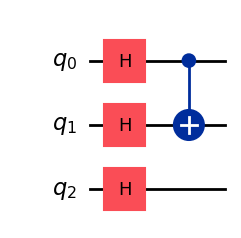

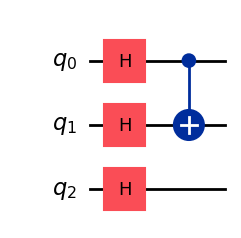

In [3]:
#Creamos el circuito cuántico de 3 qubits
qc = QuantumCircuit(3)

#Añadimos una puerta H en cada qubit y una CNOT entre los dos primeros
qc.h(0)#Qubit objetivo
qc.h(1)
qc.h(2)
qc.cx(0,1)#Qubit control y qubit objetivo

#Dibujamos el circuito
qc.draw('mpl')#El 'mpl' es para que sea bonito

Vemos que los qubits van de arriba a abajo.

La lógica de las puertas es:

circuito_cuantico.nombre_de_la_puerta(qubit_objetivo)

En caso de ser controladas:
circuito_cuantico.nombre_de_la_puerta(qubit_control, qubit_objetivo)


### Ejercicio

Crea el circuito de la imagen

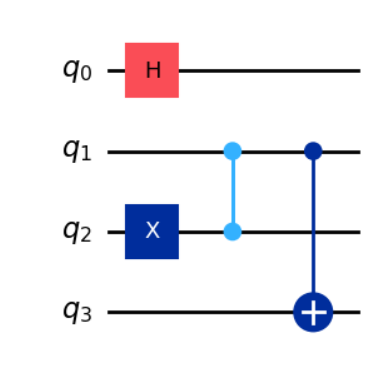

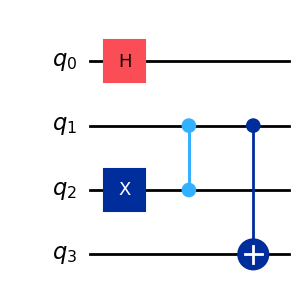

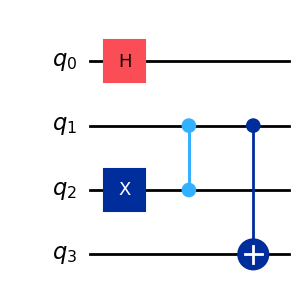

In [4]:
qc = QuantumCircuit(4)

qc.h(0)
qc.x(2)
qc.cz(1, 2)
qc.cx(1, 3)

qc.draw('mpl')

## Registros

Sin embargo, cuando tengamos un mayor número de qubits, o de conjuntos de qubits que queramos tener separados, necesitaremos poder darle nombre a los mismos. Para ello existen los registros.

In [5]:
from qiskit import QuantumRegister, ClassicalRegister

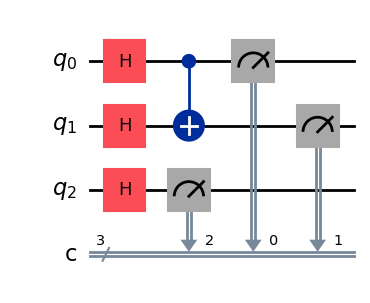

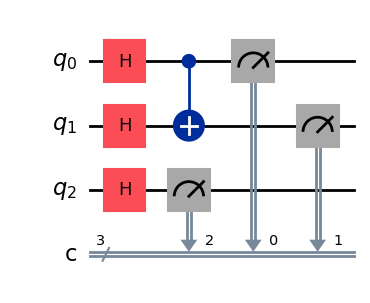

In [6]:
#Creamos un registro cuántico de 3 qubits con un cierto nombre
qr = QuantumRegister(3, name='q')
#Creamos un registro clásico de 3 bits, para guardar las mediciones de los qubits
cr = ClassicalRegister(3, name='c')

#Ahora creamos el circuito cuántico con estos registros
qc = QuantumCircuit(qr, cr, name='Circuit')

#Añadimos las puertas como antes
qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(0,1)

#Vamos a añadir una medición para cada qubit, registrada en cada bit clásico
qc.measure(0,0)#qubit, cbit
qc.measure(1,1)
qc.measure(2,2)

#Dibujamos el circuito
qc.draw('mpl')

### Ejercicio

Crea el siguiente circuito.

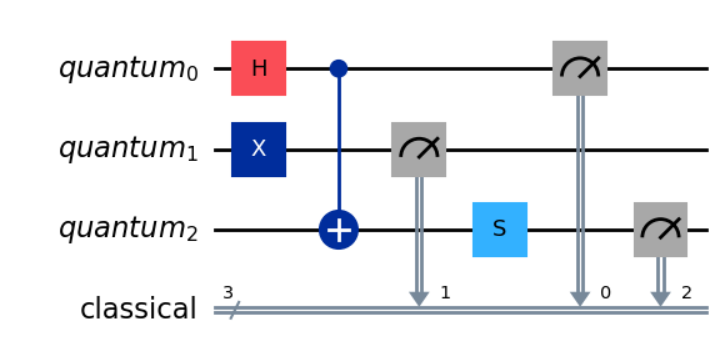

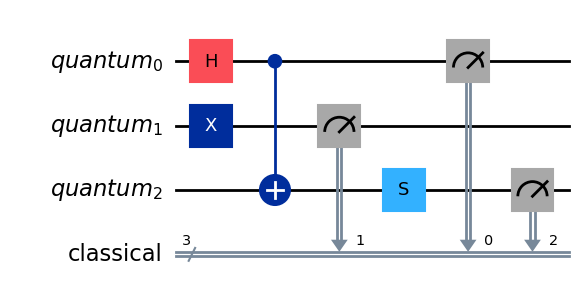

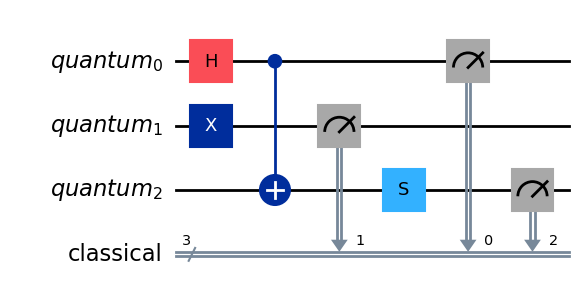

In [7]:
qr = QuantumRegister(3, name='quantum')
cr = ClassicalRegister(3, name='classical')
qc = QuantumCircuit(qr, cr, name='circuit')

qc.h(0)
qc.x(1)
qc.cx(0, 2)
qc.measure(1, 1)
qc.s(2)
qc.measure(0, 0)
qc.measure(2, 2)

qc.draw('mpl')

## Multiples registros y barreras

Vemos que obtenemos un circuito en el cual medimos cada qubit y lo registramos en un registro clásico. Sin embargo, podemos considerar el caso en el cual queremos llamar a los qubits según el registro en el que estén (teniendo 2 registros, por ejemplo). En este caso haremos una pequeña modificación. Además, haremos que quede algo más bonito.

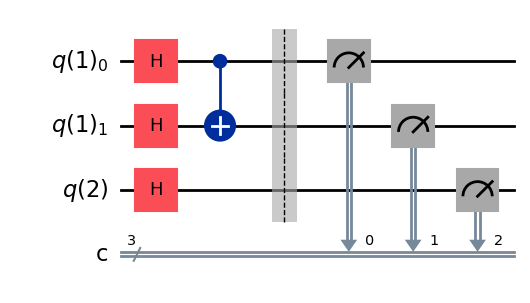

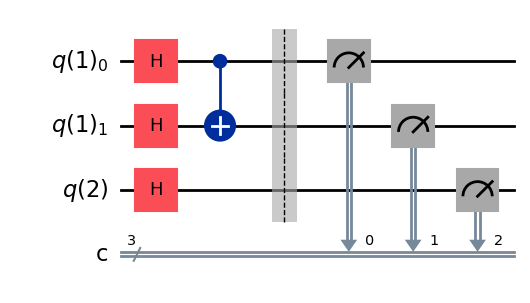

In [8]:
#Creamos un registro cuántico de 2 qubits con un cierto nombre
qr1 = QuantumRegister(2, name='q(1)')
#Creamos un registro cuántico de 1 qubit con un cierto nombre
qr2 = QuantumRegister(1, name='q(2)')
#Creamos un registro clásico de 3 bits, para guardarlas mediciones de los qubits
cr = ClassicalRegister(3, name='c')

#Ahora creamos el circuito cuántico con estos registros
qc = QuantumCircuit(qr1, qr2, cr, name='Circuit')

#Añadimos las puertas como antes
qc.h(qr1[0])#Aplicado al qubit 0 del registro 1
qc.h(qr1[1])
qc.h(qr2[0])
qc.cx(qr1[0],qr1[1])

#Añadimos una barrera para separar las puertas
qc.barrier()#Podemos indicar los qubits a los que afecta la barrera o dejarlo para que sean todos

#Vamos a añadir una medición para cada qubit, registrada en cada bit clásico
qc.measure(qr1[0],0)
qc.measure(qr1[1],1)
qc.measure(qr2[0],2)

#Dibujamos el circuito
qc.draw('mpl')

### Ejercicio

Haz el siguiente circuito.

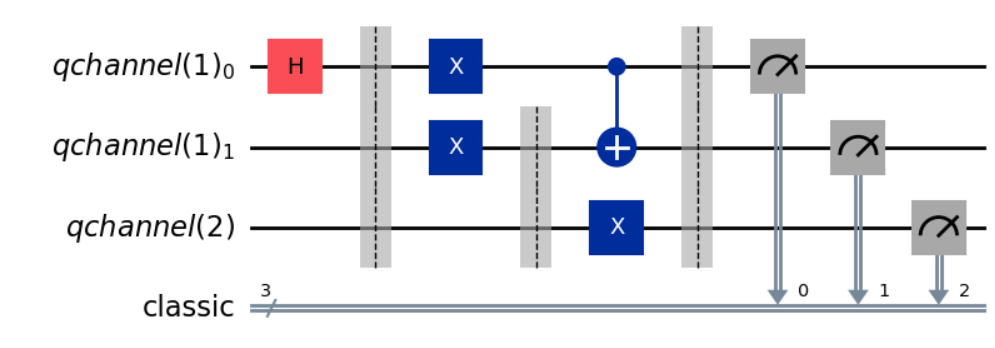

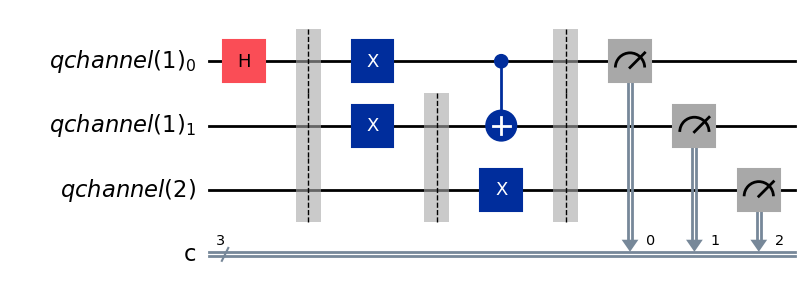

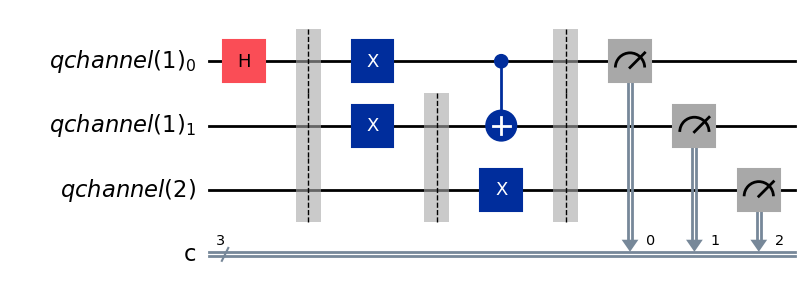

In [12]:
qr1 = QuantumRegister(2, name='qchannel(1)')
qr2 = QuantumRegister(1, name='qchannel(2)')
cr = ClassicalRegister(3, name='c')
qc = QuantumCircuit(qr1, qr2, cr, name='Circuit')

qc.h(qr1[0])
qc.barrier()
qc.x(qr1[0])
qc.x(qr1[1])
qc.barrier(qr1[1], qr2[0])
qc.cx(qr1[0], qr1[1])
qc.x(qr2[0])
qc.barrier()
qc.measure(qr1[0], 0)
qc.measure(qr1[1], 1)
qc.measure(qr2[0], 2)

qc.draw('mpl')

## Puertas múltiples

Ahora bien, si queremos aplicar la misma puerta a varios qubits a la vez, solo tendremos que pasarle todos estos como una lista. Podemos hacer lo mismo con las puertas controladas, pero todos los controles van juntos y todos los objetivos también.

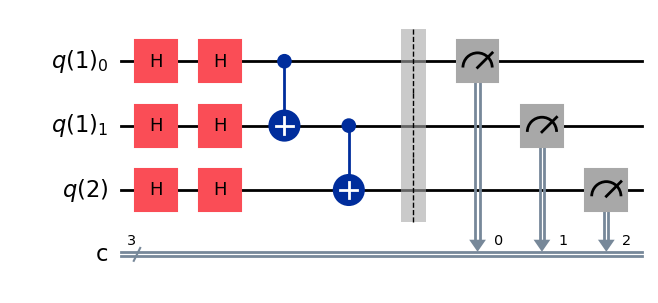

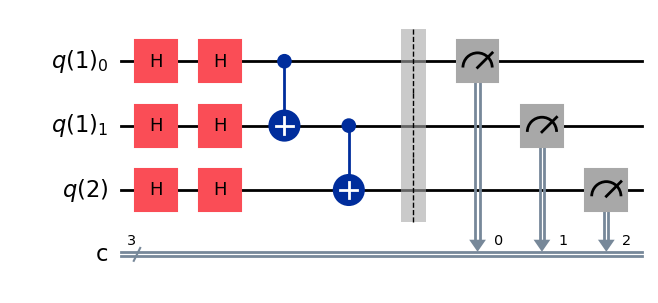

In [13]:
#Creamos un registro cuántico de 2 qubits con un cierto nombre
qr1 = QuantumRegister(2, name='q(1)')
#Creamos un registro cuántico de 1 qubit con un cierto nombre
qr2 = QuantumRegister(1, name='q(2)')
#Creamos un registro clásico de 3 bits, para guardarlas mediciones de los qubits
cr = ClassicalRegister(3, name='c')

#Ahora creamos el circuito cuántico con estos registros
qc = QuantumCircuit(qr1, qr2, cr, name='Circuit')

#Añadimos las puertas como antes
qc.h([qr1[0],qr1[1],qr2[0]])
qc.h(qr1[:]+[qr2[0]])
qc.cx([qr1[0],qr1[1]],[qr1[1],qr2[0]])

#Añadimos una barrera para separar las puertas
qc.barrier()#Podemos indicar los qubits a los que afecta la barrera o dejarlo para que sean todos

#Vamos a añadir una medición para cada qubit, registrada en cada bit clásico
qc.measure(qr1[:]+qr2[:],cr)#Podemos llamar a todos los qubits del registro con [:] como lista

#Dibujamos el circuito
qc.draw('mpl')

### Ejercicio

Construye el siguiente circuito con el menor número de líneas que puedas.

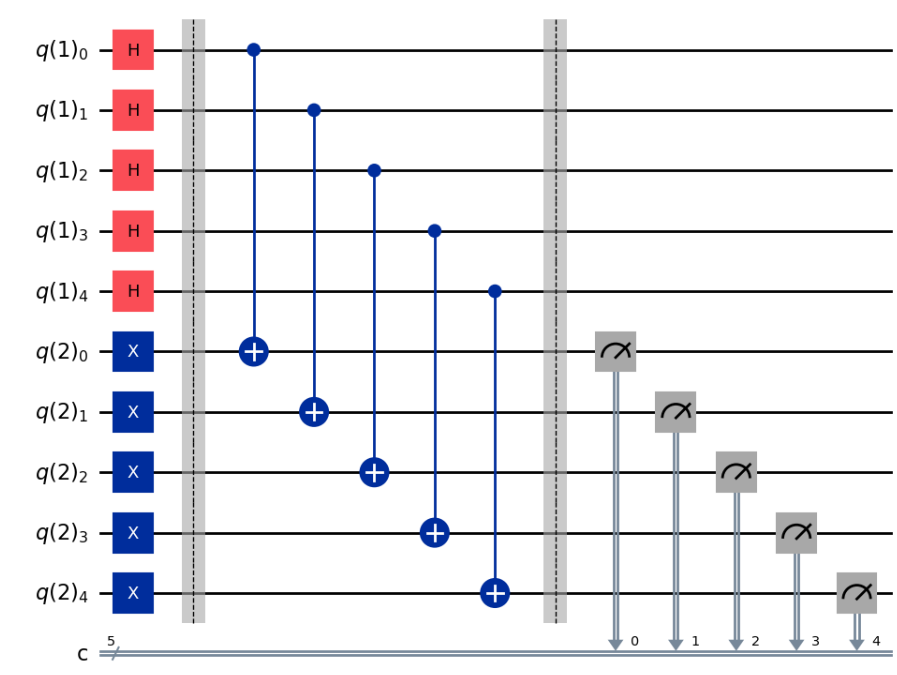

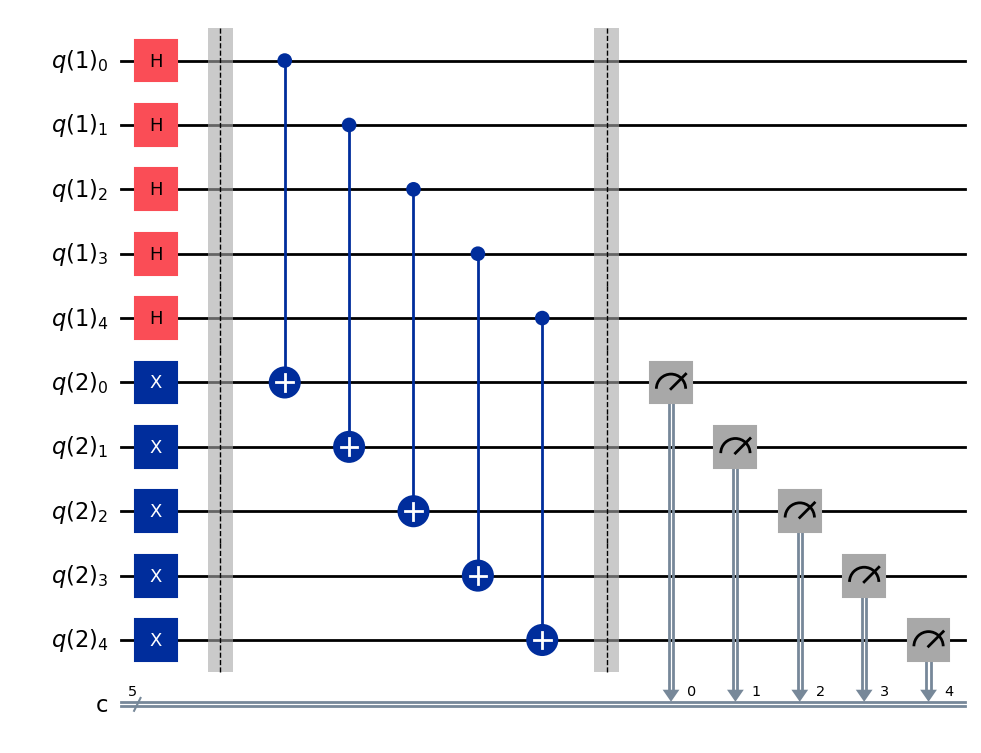

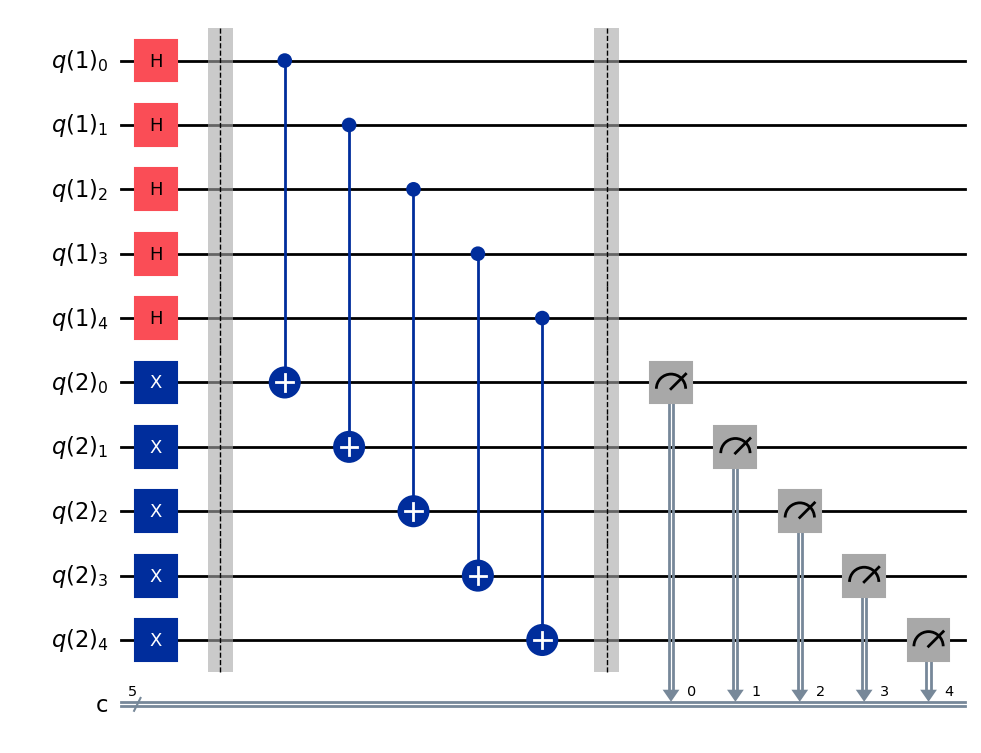

In [17]:
#Creamos un registro cuántico de 2 qubits con un cierto nombre
qr1 = QuantumRegister(5, name='q(1)')
#Creamos un registro cuántico de 1 qubit con un cierto nombre
qr2 = QuantumRegister(5, name='q(2)')
#Creamos un registro clásico de 3 bits, para guardarlas mediciones de los qubits
cr = ClassicalRegister(5, name='c')
#Ahora creamos el circuito cuántico con estos registros
qc = QuantumCircuit(qr1, qr2, cr, name='Circuit')

qc.h(qr1[:])
qc.x(qr2[:])
qc.barrier()
qc.cx(qr1, qr2)
qc.barrier()
qc.measure(qr2, cr)

qc.draw('mpl')

## Más información sobre puertas

Aquí tenemos una lista de las puertas que existen: https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#methods-to-add-standard-instructions

No unitarias:

* initialize()	Inicializa a un cierto vector
* reset()	Resetea el qubit

Unitarias:

* h()	HGate
* id()	IGate
* iswap()	iSwapGate
* p()	PhaseGate
* pauli()	PauliGate
* prepare_state()	StatePreparation
* r()	RGate
* rx()	RXGate
* rxx()	RXXGate
* ry()	RYGate
* ryy()	RYYGate
* rz()	RZGate
* rzx()	RZXGate
* rzz()	RZZGate
* s()	SGate
* swap()	SwapGate
* t()	TGate
* u()	UGate
* unitary()	UnitaryGate
* x()	XGate
* y()	YGate
* z()	ZGate

Para los dagger, muchas veces llega con poner dg detrás del nombre (sdg())

Multicontroladas:



* mcp()	PhaseGate
* mcrx()	RXGate
* mcry()	RYGate
* mcrz()	RZGate
* mcx()	XGate





Si en algún momento necesitamos copiar el circuito, podemos usar circuit.copy(name=nombre_nuevo), y si solo queremos la estructura, pero no las puertas podemos usar circuit.copy_empty_like().

Si necesitamos añadir qubits: .add_qubits()

Para registros: .add_register()

En caso de necesitar añadir cosas extrañas al circuito, podemos utilizar el circuit.append(instruccion, qubits, cbits)

Si queremos juntar dos circuitos, podemos usar circuit.compose(otro_circuito, qubits, cbits, inplace=False)

Si se pone inplace = True, no devuelve nada, porque modifica el circuito original directamente.

Para crear una instrucción desde un circuito, si usa solo qubits, podemos usar .to_gate(), mientras que si tiene también registro clásico, necesitamos .to_instruction()

---
# Circuitos condicionales

Queremos hacer circuitos cuánticos híbridos, en los cuales partes cuánticas del circuito dependerán de resultados clásicos. Para ello usaremos métodos condicionales.

## If

Queremos aplicar una puerta si hemos obtenido cierto resultado en una medición.

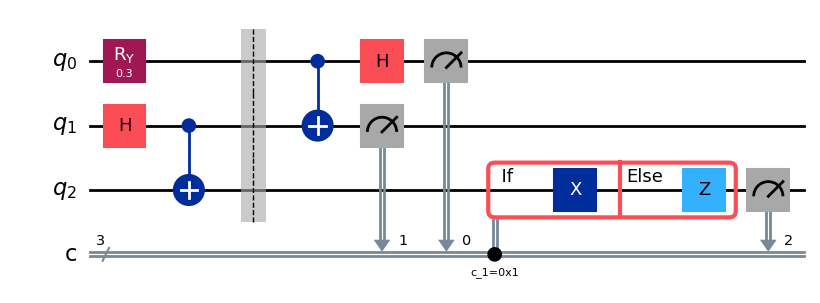

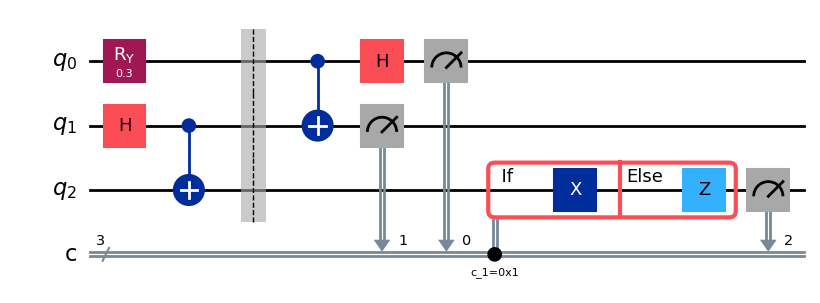

In [18]:
#Creamos el circuito
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')

qc = QuantumCircuit(qr, cr, name='Circuit')
#Puertas
qc.ry(0.3, 0)#Primero el ángulo de rotación y luego el qubit objetivo
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])

#Si el valor en cr[1] es 1, aplicamos una puerta x en el 2, sino, una z
with qc.if_test((cr[1], 1)) as else_:
    qc.x(2)
with else_:
    qc.z(2)

qc.measure(2,2)

qc.draw('mpl')

### Ejercicio

Construye el siguiente circuito.

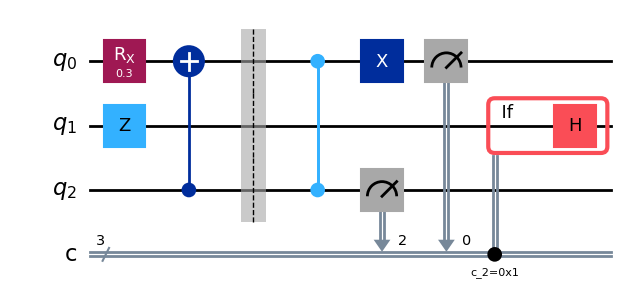

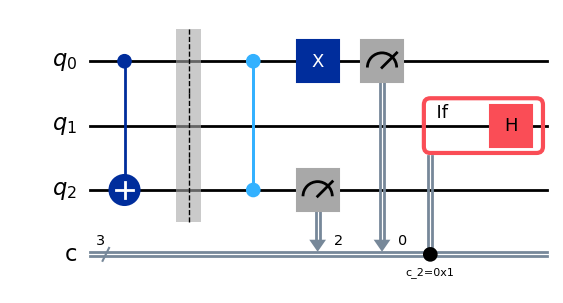

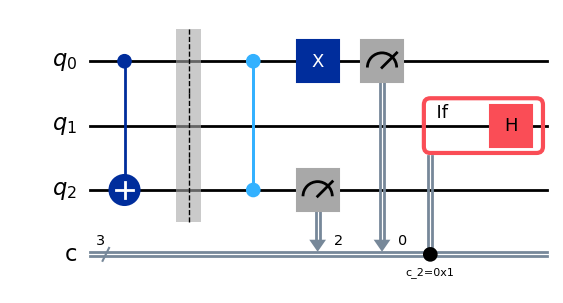

In [22]:
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')
qc = QuantumCircuit(qr, cr, name='Circuit')

qc.cx(qr[0], qr[2])
qc.barrier()
qc.cz(qr[0], qr[2])
qc.x(qr[0])
qc.measure(qr[2], cr[2])
qc.measure(qr[0], cr[0])

with qc.if_test((cr[2], 1)):
    qc.h(1)

qc.draw('mpl')

## While

Ahora queremos que se vaya repitiendo una cierta estructura hasta medir 0 en el primer qubit.

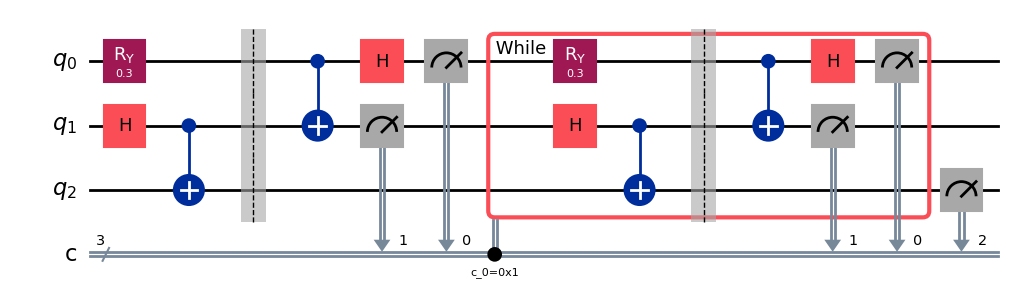

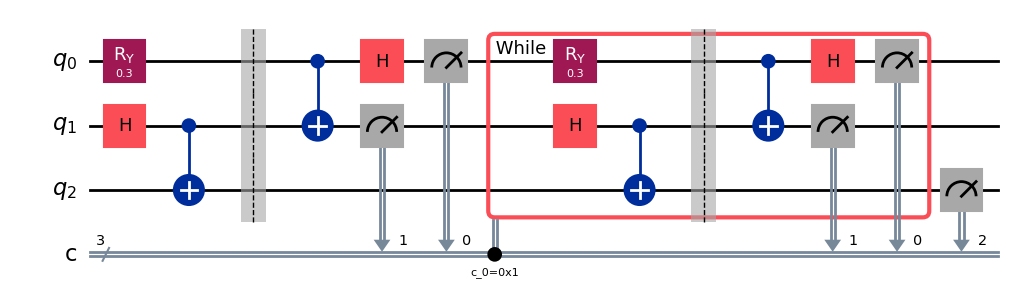

In [23]:
#Creamos el circuito
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')

qc = QuantumCircuit(qr, cr, name='Circuit')
#Puertas
qc.ry(0.3, 0)#Primero el ángulo de rotación y luego el qubit
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])

#Aplicamos este circuito hasta que la medida del 0 sea 0
with qc.while_loop((cr[0], 1)):
    qc.ry(0.3, 0)#Primero el ángulo de rotación y luego el qubit
    qc.h(1)
    qc.cx(1,2)
    qc.barrier()
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])

qc.measure(2,2)
qc.draw('mpl')

### Ejercicio

Construye el siguiente circuito.

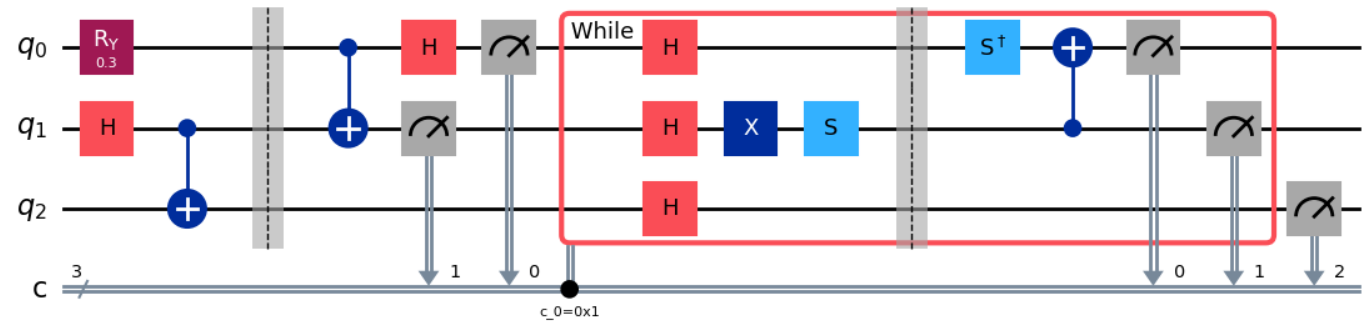

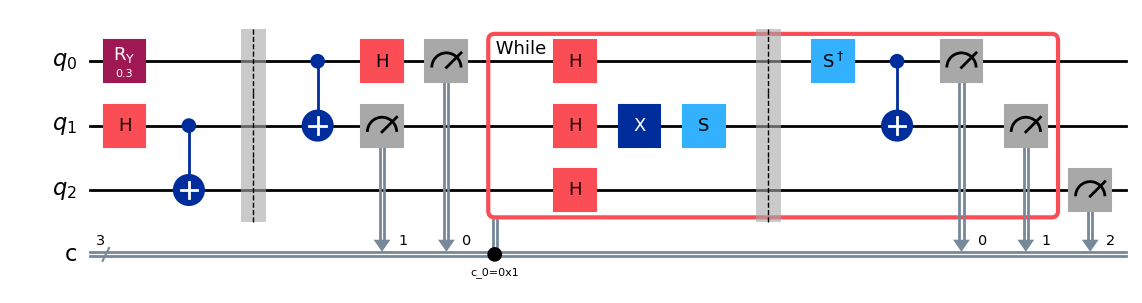

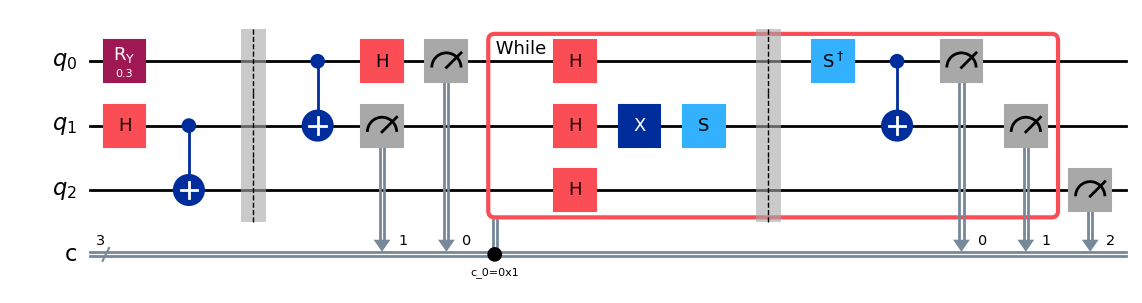

In [25]:
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')
qc = QuantumCircuit(qr, cr, name='Circuit')

qc.ry(0.3, 0)#Primero el ángulo de rotación y luego el qubit
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])

#Aplicamos este circuito hasta que la medida del 0 sea 0
with qc.while_loop((cr[0], 1)):
    qc.h(qr)
    qc.x(qr[1])
    qc.s(qr[1])
    qc.barrier()
    qc.sdg(qr[0])
    qc.cx(qr[0], qr[1])
    qc.measure(qr[:2],cr[:2])

qc.measure(2,2)
qc.draw('mpl')

---
# Funciones generadoras de circuitos

Vamos a abstraernos un poco y crear una función que, dado un input, nos genere el circuito cuántico que queremos.

En este caso empezaremos haciendo un estado GHZ de n qubits, siendo n la entrada.

In [26]:
def GHZ_circuit(n:int):
    #Creamos el registro
    qr = QuantumRegister(n, name='GHZ')
    qc = QuantumCircuit(qr, name='Circuit GHZ')

    #Puertas
    qc.h(0)
    #Posibilidad 1
    for i in range(n-1):
        qc.cx(i,i+1)

    #Posibilidad 2
    #qc.cx(range(n-1), range(1,n))

    #Devolvemos el circuito
    return qc

Comprobamos si funciona.

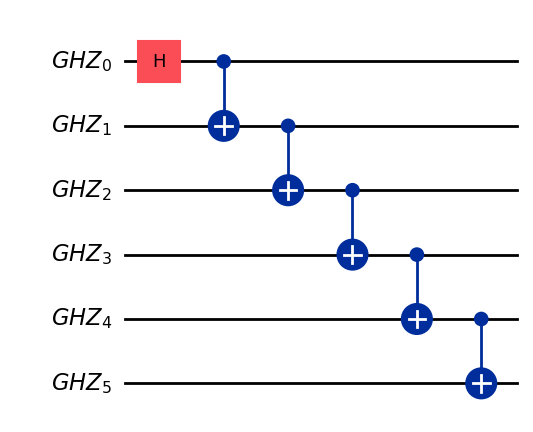

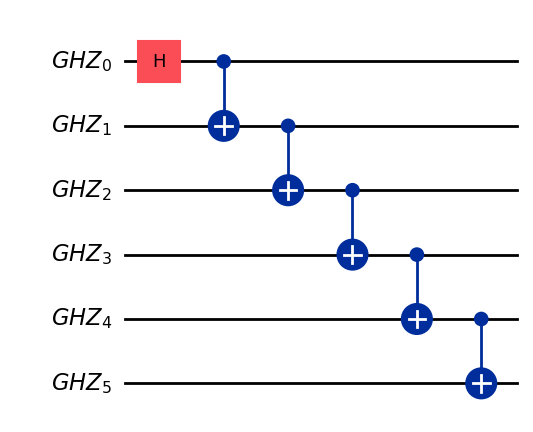

In [27]:
n = 6
qc = GHZ_circuit(n)
qc.draw('mpl')

Ahora bien, ¿y si quiero hacer que este circuito sea un operador? Lo convierto en una puerta.

In [28]:
gate = qc.to_gate()

Y ahora pruebo a añadirlo a un circuito con el append.

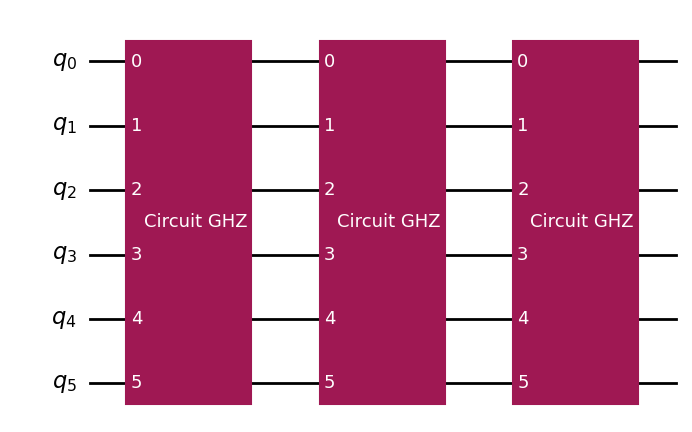

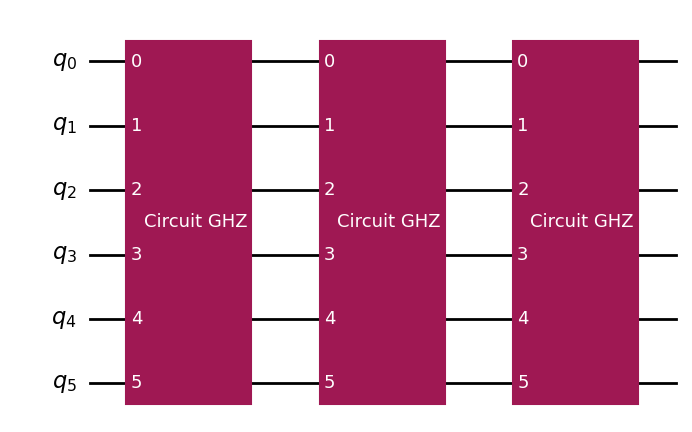

In [29]:
qc1 = QuantumCircuit(n)
#Añado la puerta
qc1.append(gate, range(n))
qc1.append(gate, range(n))
qc1.append(gate, range(n))

qc1.draw('mpl')

Podemos ver que se conserva el nombre del circuito original.

Nos gustaría saber cuales son las puertas que componen esta gate. Para eso usaremos el decompose. Primero le diremos qué puerta(s) queremos descomponer, y después el número de pasos de descomposición.

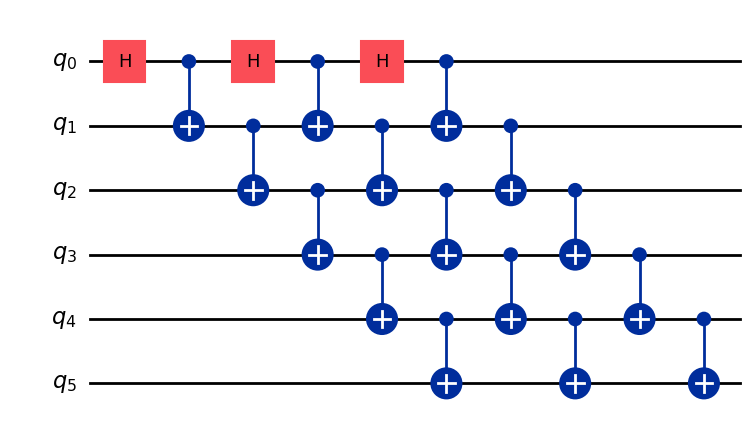

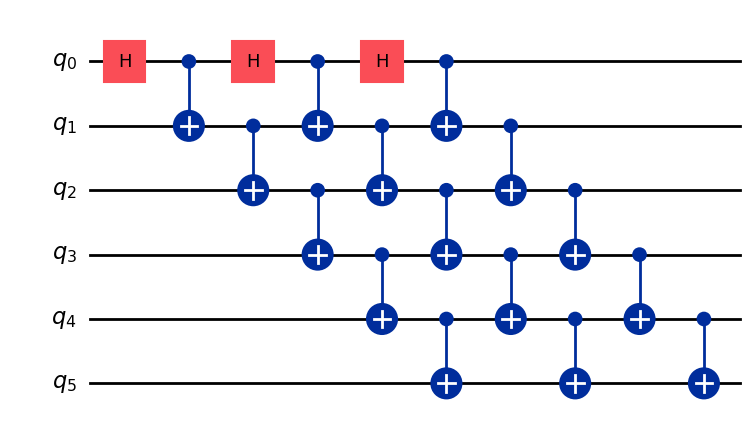

In [30]:
qc2 = qc1.decompose('Circuit GHZ', reps=1)#Descompon 'Circuit GHZ' una sola vez.
qc2.draw('mpl')

¿Y si queremos repetir un circuito varias veces? Para eso tenemos el repeat.

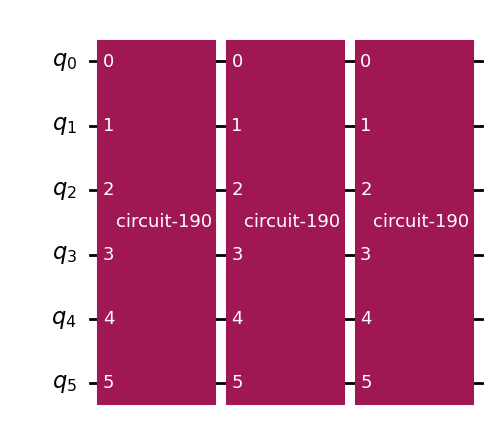

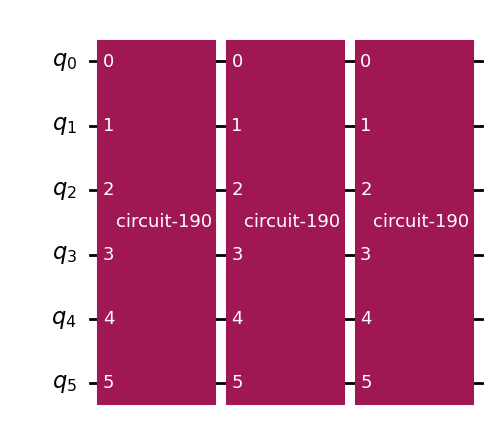

In [31]:
new_qc = qc2.repeat(3)#Cuantas veces se repite
new_qc.draw('mpl')

Podemos descomponerlo por su nombre para verlo mejor (cambia cada vez).

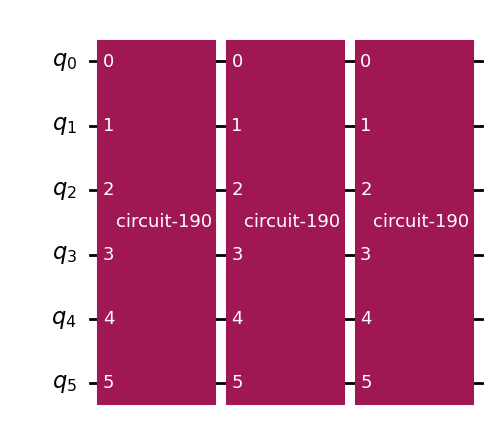

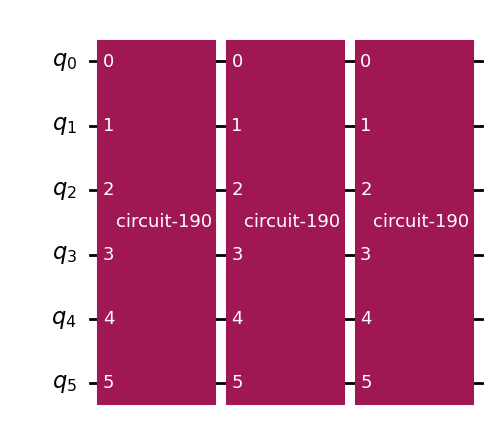

In [32]:
new_qc.decompose('circuit-194', reps=1).draw('mpl')

Si queremos aplicar la operación inversa, usamos .inverse().

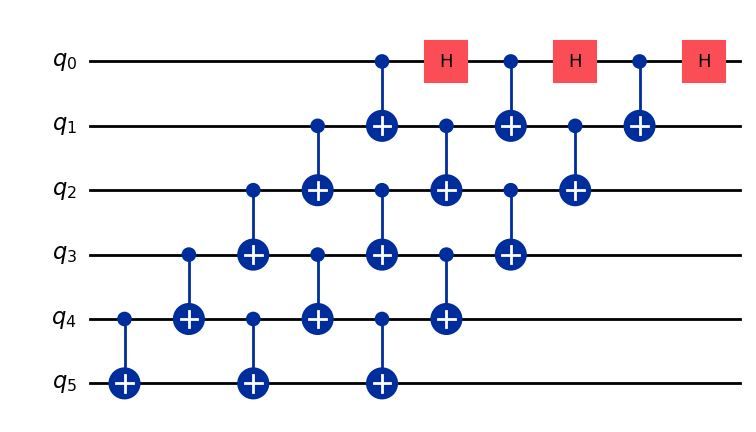

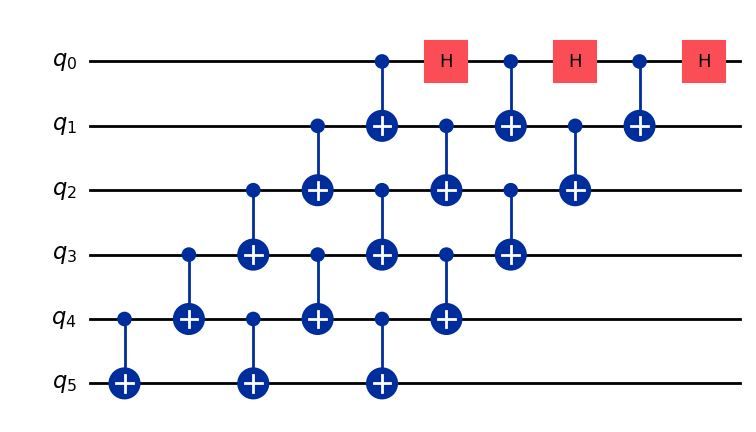

In [33]:
qc2.inverse().draw('mpl')

### Ejercicio

Implementa la siguiente puerta

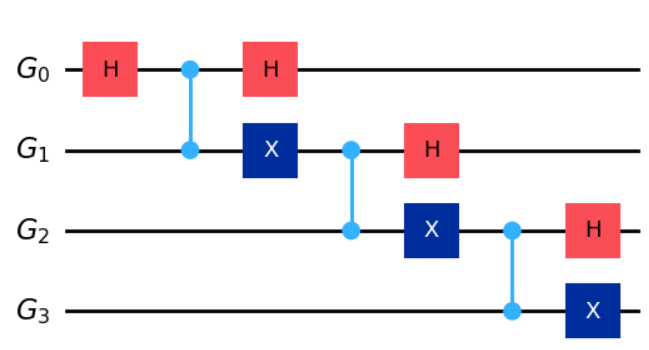

y aplica su inversa a un circuito.



In [35]:
def G_circuit(n:int):
    #Creamos el registro
    qr = QuantumRegister(n, name='G')
    qc = QuantumCircuit(qr, name='Circuit G')

    #Puertas
    qc.h(0)
    for i in range(n-1):
        qc.cz(qr[i], qr[i+1])
        qc.h(i)
        qc.x(i+1)

    #Devolvemos el circuito
    return qc

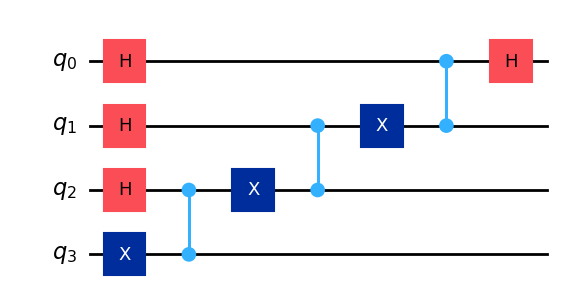

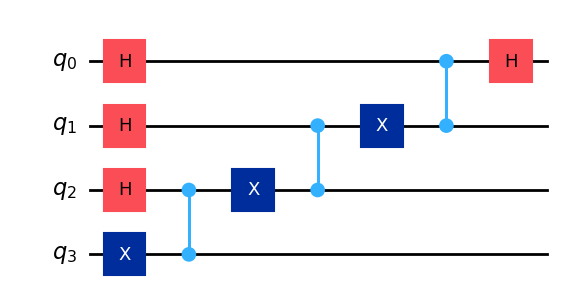

In [44]:
qc1 = G_circuit(4)
gate = qc1.to_gate()
qc2 = QuantumCircuit(4, name='Circuit G_dg')
qc2.append(gate.inverse(), range(4))
qc2.decompose('Circuit G_dg', reps=1).draw('mpl')

---
#Un poco de IBM

En la IBM Quantum Platform podéis encontrar bastantes cosas interesantes para la ejecución de vuestros circuitos cuánticos.

Aquí tenéis la lista de ordenadores cuánticos disponibles

https://quantum.ibm.com/services/resources

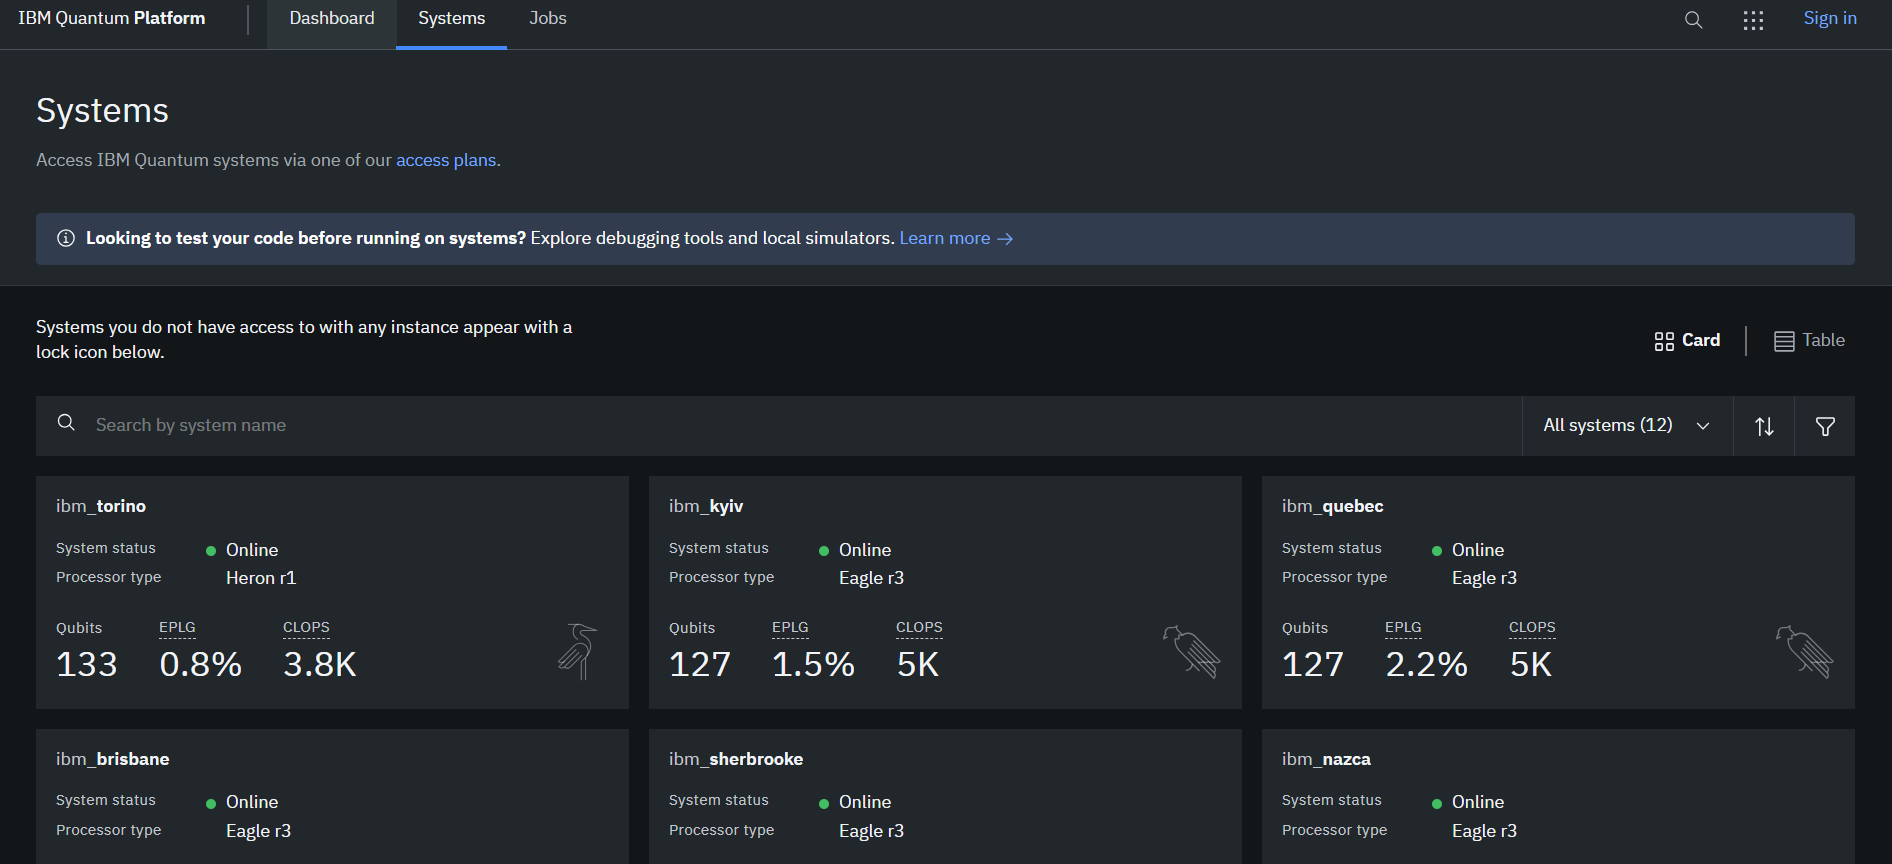

También tenéis disponibles todos las características de cada ordenador

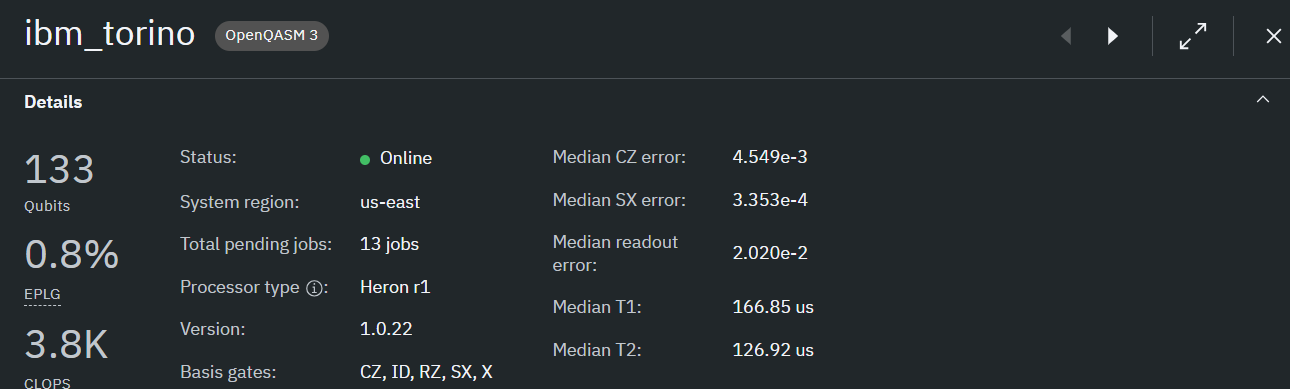

Y los errores de cada qubit, de cada conexión entre ellos, tiempos y demás información útil:

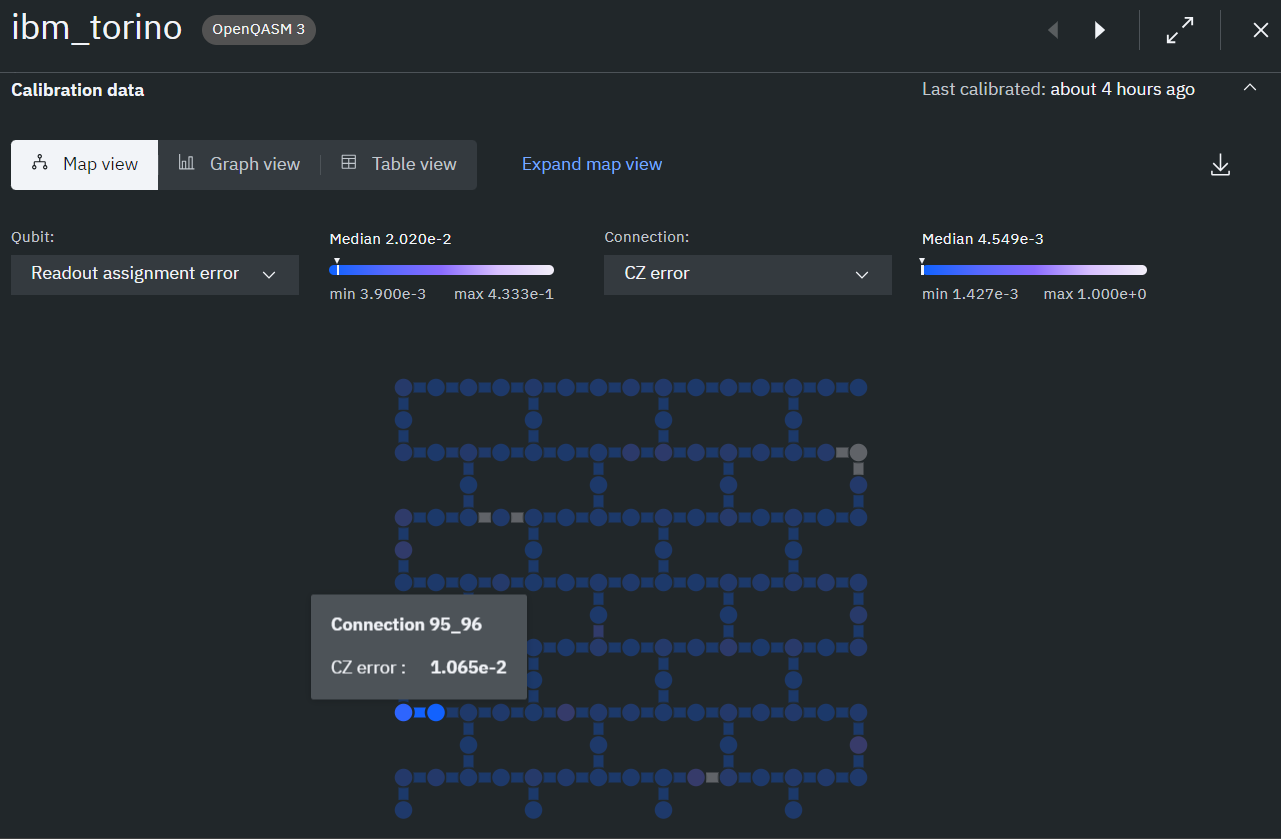


¿Cómo obtengo acceso a todo lo que hay? Fácil, haciéndose una cuenta.

##Pasos:


1. https://quantum.ibm.com/
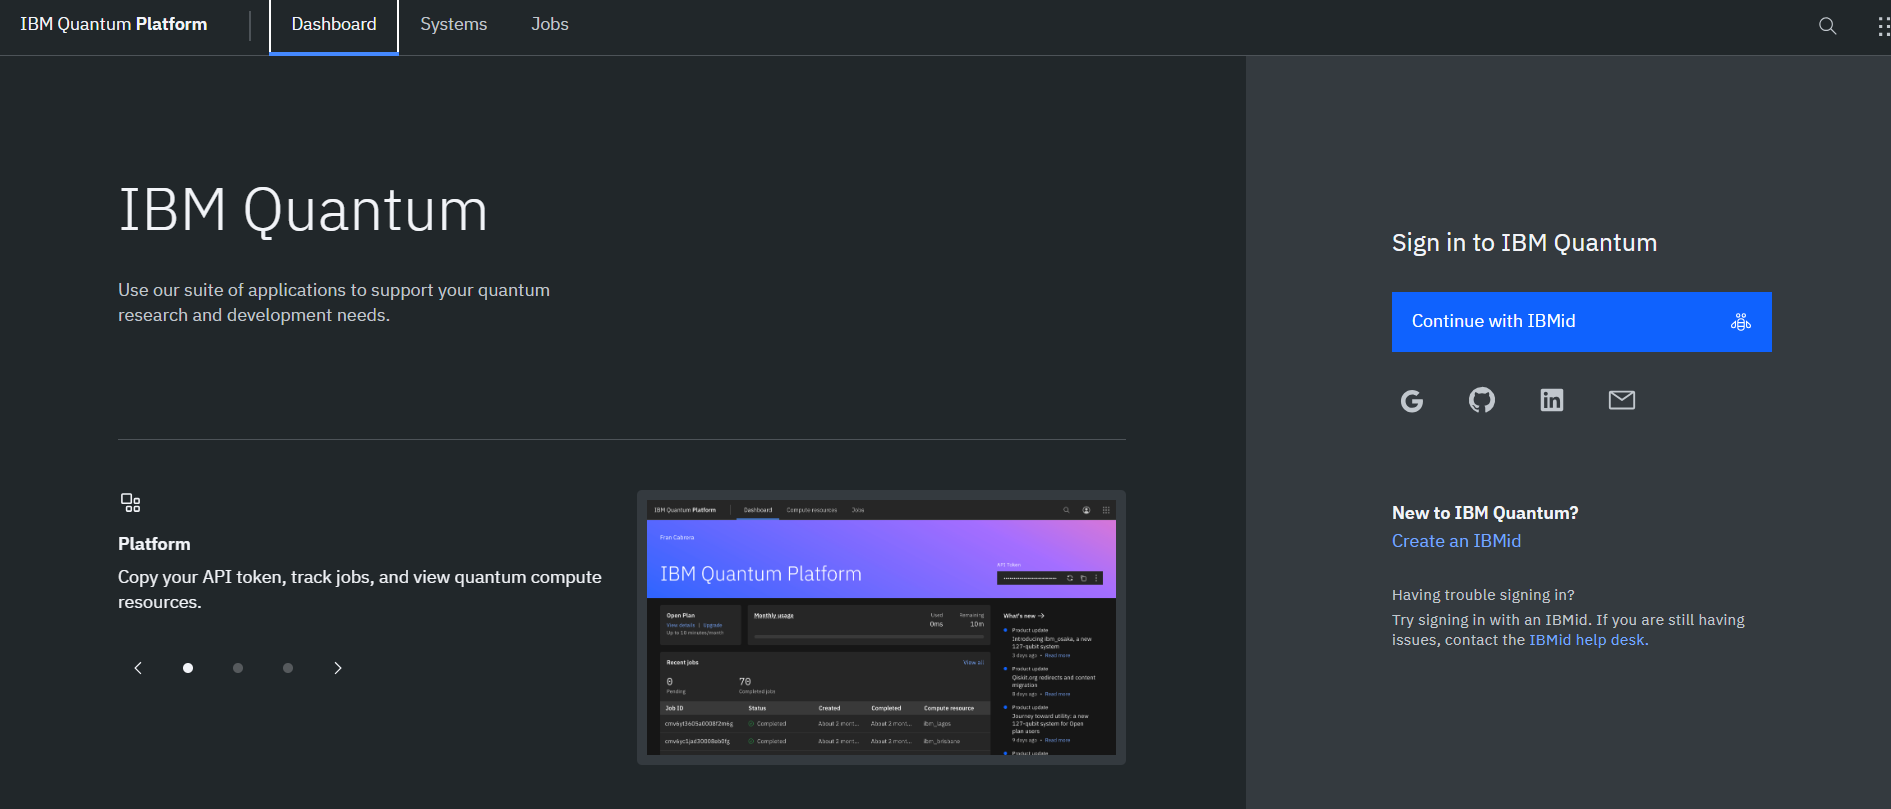

2. Creamos un IBMid
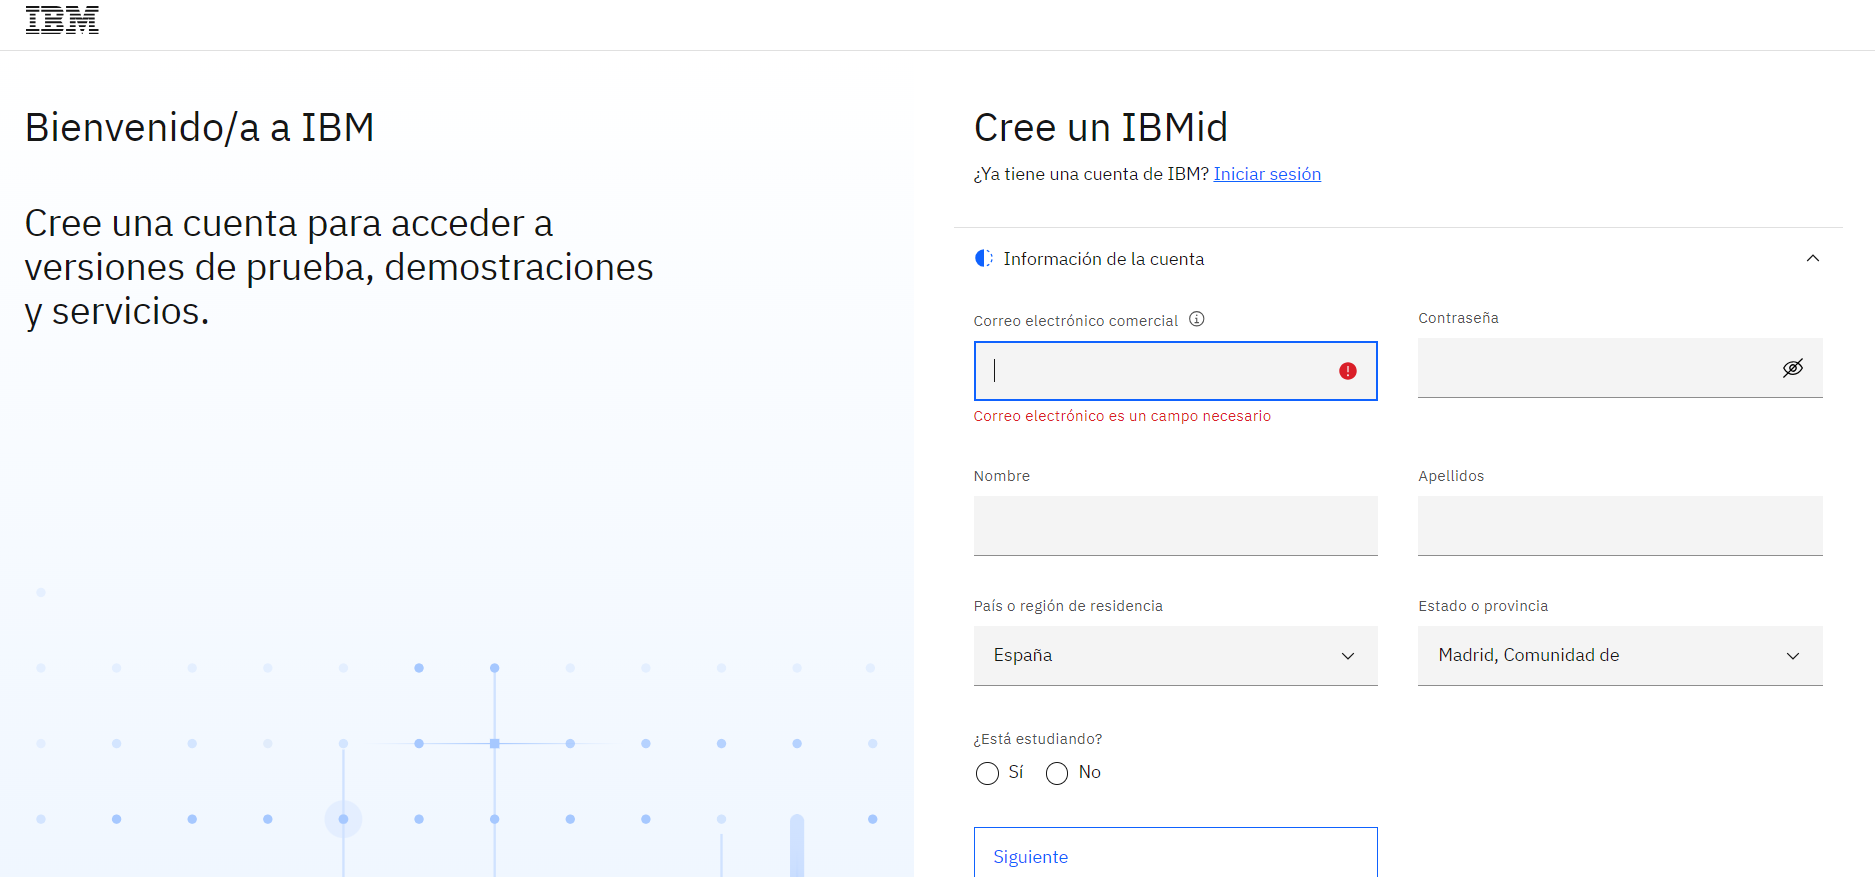

3. Ya estamos en el dashboard automáticamente al terminar.

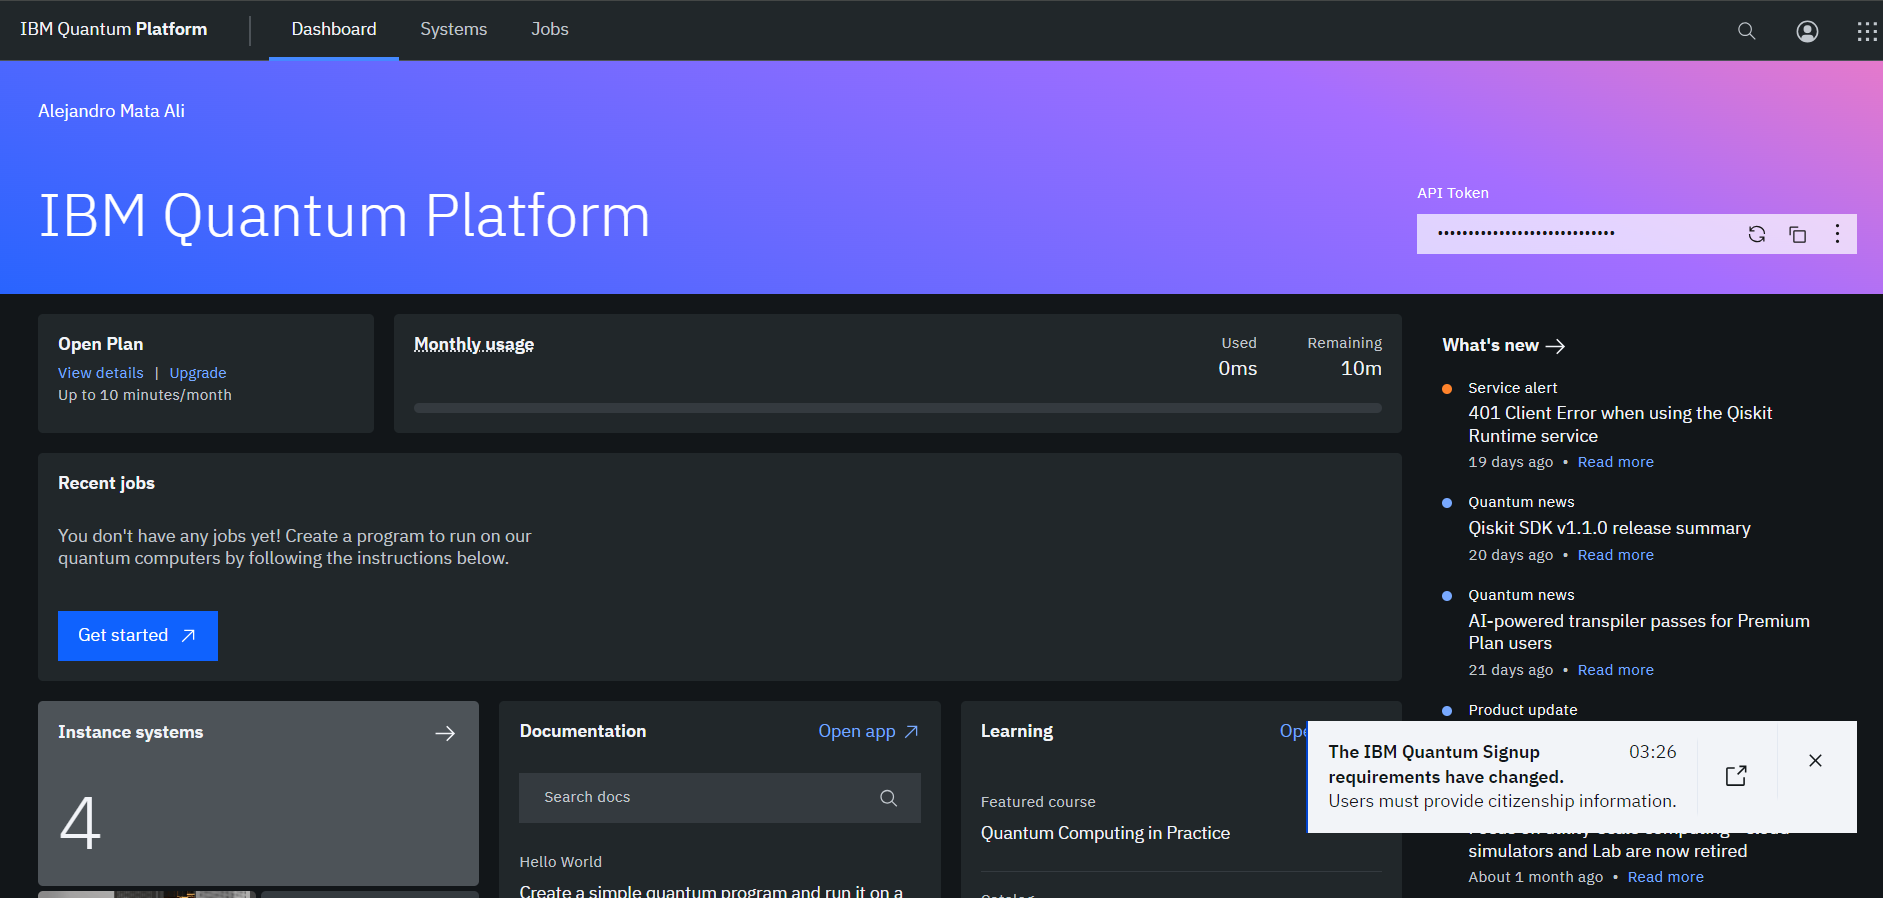



Ahora lo importante es vuestro API Token, que nos servirá para utilizar el QiskitRuntime

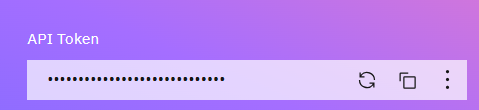

Si por lo que sea necesitáis cambiarlo, podéis hacerlo desde ahí. También podéis copiarlo, cosa necesaria para este caso. Tenéis 10 minutos de uso gratis al mes, tenedlo en cuenta.

In [45]:
from qiskit_ibm_runtime import QiskitRuntimeService

Vamos a iniciar nuestra sesión con el token. Este servicio nos servirá para mandar jobs al ordenador real.

In [48]:
#Para una sola vez
service = QiskitRuntimeService(channel='ibm_quantum', #o ibm cloud en otros casos
                                token = '8f7a8e0bdf5f9ba503fc5bdec3bff688d26de8c2abffbb7acd7652a8301b1b4aeeb6c6be71fce6ef6df3b6329e332669b737d5a29fb22eced45b433fbf866b31')

#Si queremos guardarlo
QiskitRuntimeService.save_account(channel='ibm_quantum', #o ibm cloud en otros casos
                                token = '8f7a8e0bdf5f9ba503fc5bdec3bff688d26de8c2abffbb7acd7652a8301b1b4aeeb6c6be71fce6ef6df3b6329e332669b737d5a29fb22eced45b433fbf866b31')

---
# Ejecución del circuito cuántico

Ahora vamos a ejecutar nuestro circuito cuántico en algún backend, para lo cual utilizaremos el QiskitRuntimeService.

## Obtener el backend

El backend puede ser tanto un simulador como un ordenador cuántico real, al cual llamaremos utilizando el get_backend(nombre)

In [67]:
backend_name = 'ibm_sherbrooke' #Escogemos un backend (en este caso, un ordenador)
backend = service.backend(backend_name)#Conseguimos el backend

También podemos usar un fakeprovider, útil para simulaciones.

In [68]:
from qiskit.providers.fake_provider import GenericBackendV2

In [69]:
#Vamos a usar un fake backend para hacer las pruebas, ya que IBM está teniendo problemas
backend = GenericBackendV2(num_qubits=4)

## Transpilación

Algo muy importante es la transpilación de los circuitos. Los ordenadores cuánticos solo pueden realizar unas ciertas operaciones, por lo que tendremos que traducir las operaciones que tenemos en nuestro circuito cuántico en operaciones que el propio ordenador pueda comprender.

In [70]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

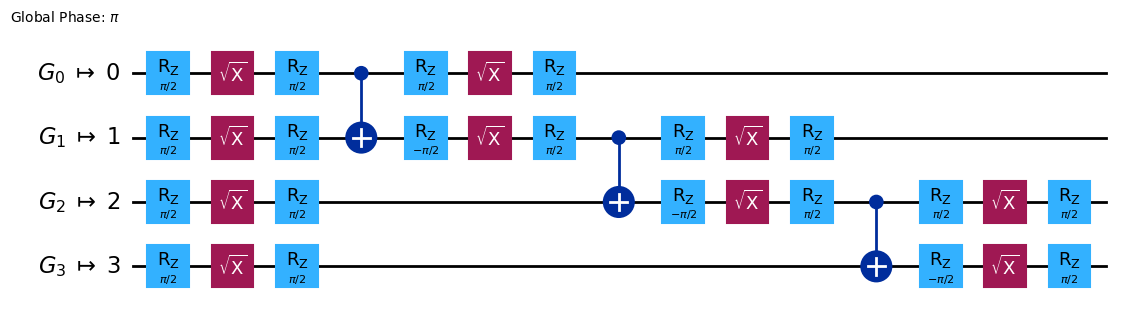

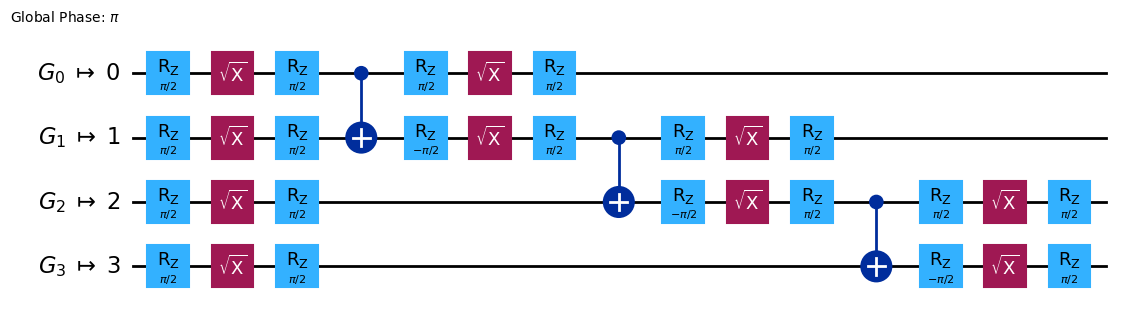

In [71]:
#Objeto que nos hará todo el tema del transpilado. Le decimos el backend y cuanto queremos que optimice el circuito.
# 0 : nada, 3: optimización fuerte (más lento)
pass_Manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

#Generamos el circuito transpilado
qc = GHZ_circuit(4)
qc_transpiled = pass_Manager.run(qc)

#También podemos transpilar operadores, pero por ahora no nos interesa
qc_transpiled.draw('mpl')

Vemos que ha hecho la traducción de las puertas.

Otra manera de hacerlo es directamente con el transpile.

In [72]:
from qiskit import transpile

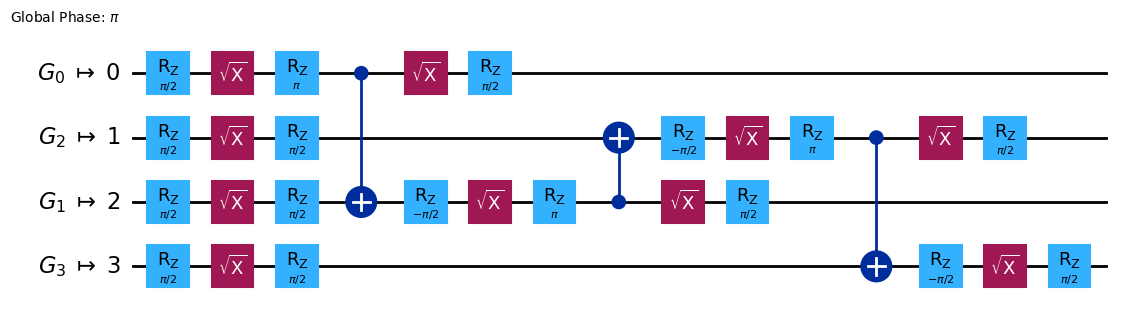

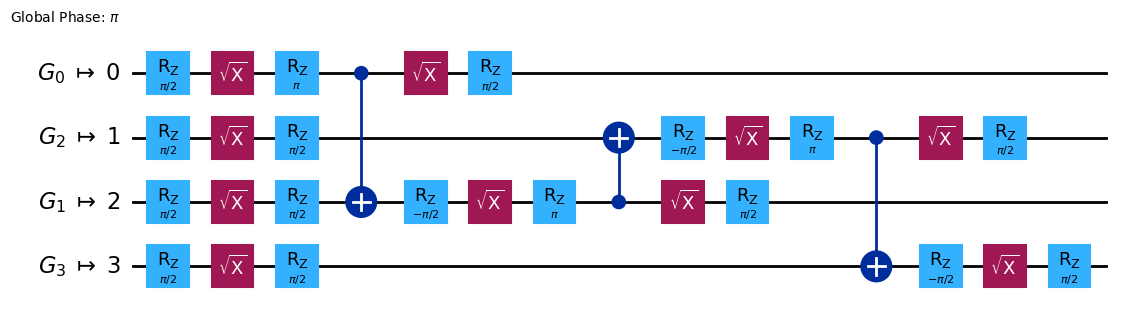

In [73]:
qc_transpiled2 = transpile(qc, backend)

qc_transpiled2.draw('mpl')

##Ejecutar el circuito transpilado

Vamos a ejecutar las mediciones que deseamos del circuito en nuestro backend, para obtener las cuentas de mediciones del mismo.

In [74]:
from qiskit.visualization import plot_histogram

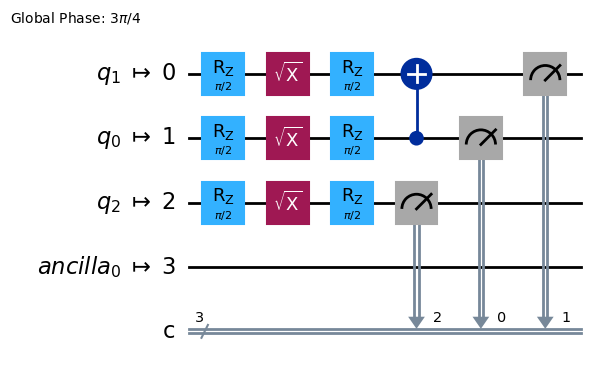

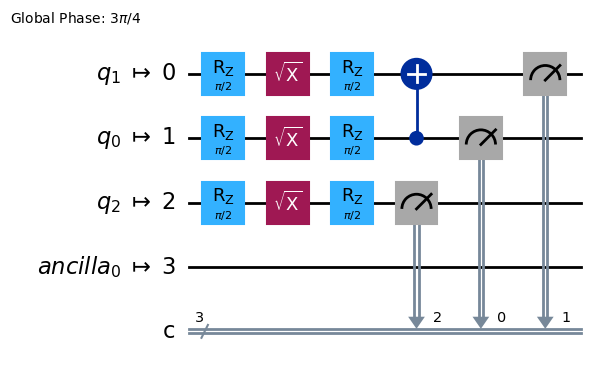

In [75]:
#Creamos un circuito
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr,cr)
qc.h([0,1,2])
qc.cx(0,1)
qc.measure(range(3), range(3))

#Lo transpilamos
qc_transpiled = transpile(qc, backend)

qc_transpiled.draw('mpl')

/usr/local/Caskroom/miniconda/base/envs/vscode/lib/python3.12/site-packages/qiskit/providers/fake_provider/generic_backend_v2.py:975: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


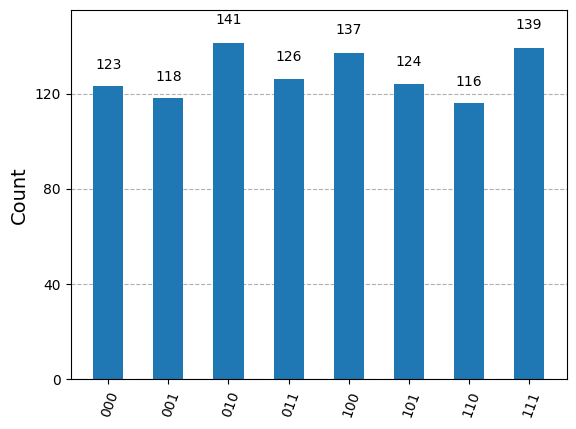

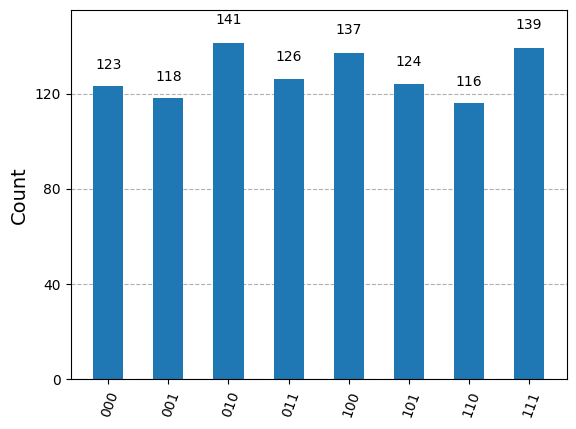

In [76]:
#Creamos el job
job = backend.run(qc_transpiled)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Vamos a obtener el StateVector de un cierto circuito. Importante: esto no funciona si tenemos mediciones por el medio.

In [77]:
from qiskit.quantum_info import Statevector

In [78]:
#Circuito sin la medición
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr,cr)
qc.h([0,1,2])
qc.cx(0,1)

#Objeto que considera el 0 como inicial
state = Statevector.from_int(0,2**3)

#Aplicamos el circuito y vemos el StateVector
state.evolve(qc)

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


Con esto hemos visto los aspectos fundamentales de trabajar con Qiskit, cómo hacer un circuito, cómo ponerle condiciones, cómo generarlo a partir de una función, volverlo una puerta, descomponerlo, transpilarlo y ejecutarlo.